In [1]:
import numpy as np
from scipy.stats import norm, beta

class sphere_dist:
    def rvs(self, size=(1,)):
        """
        Generate points uniformly on S2
        Returns polar coords (theta, phi)
        """
        p = norm().rvs(size=(3, *size))
        p /= np.linalg.norm(p, axis=0)
        
        ra = np.arctan2(p[1,...],p[0,...])
        dec = np.pi/2 - np.arccos(p[2,...])
        
        return np.stack((ra, dec), axis=-1)

# parameters  of  the DP
alpha, H = 20, sphere_dist()

# How many realisations to draw from DP
N = 5

# Maximum number of clusters
K = 100

# Break the stick
beta_k = beta(1, alpha).rvs(size=(N, K))
pi_k = beta_k.copy()
pi_k[:,1:] = beta_k[:,1:] * (1 - beta_k[:,:-1]).cumprod(axis=1)

# Draw the atoms
atoms = H.rvs(size=(N,K))

In [2]:
def kernel(ra, dec, ra_0, dec_0, d=0.3):
    ans = np.exp(-0.5*((dec-dec_0)/d)**2)/np.sqrt(2*np.pi*d**2)
    ans *= np.exp(-0.5*((ra-ra_0)/(d*np.sin(ra_0)))**2)/np.sqrt(2*np.pi*d**2*np.sin(ra_0)**2)
    return ans

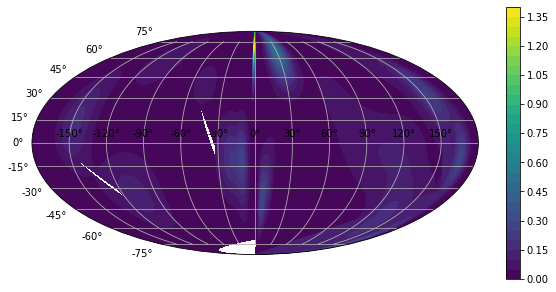

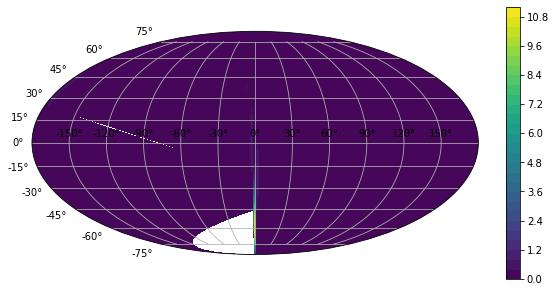

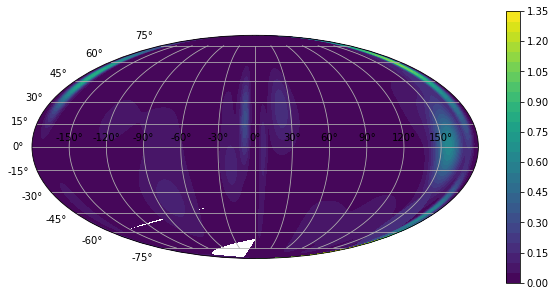

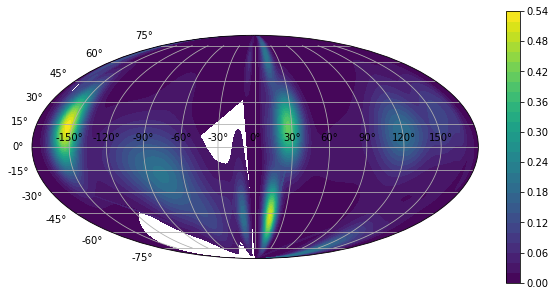

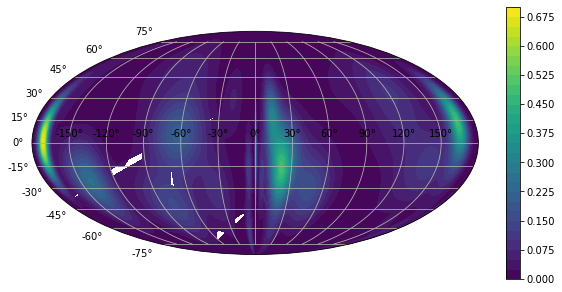

In [3]:
import matplotlib.pyplot as plt

Ra = np.linspace(-np.pi, np.pi, 300)
Dec = np.linspace(-np.pi/2, np.pi/2, 300)
Ra, Dec = np.meshgrid(Ra, Dec)

for r in range(N):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111, projection="mollweide")
    ax.grid(True)

    Density = np.sum([pi_k[r,k]*kernel(Ra, Dec, atoms[r,k,0], atoms[r,k,1]) for k in range(K)], axis=0)
    C = ax.contourf(Ra, Dec, Density, 30)
    fig.colorbar(C)
    plt.show()